# Comparison of Projection, Transformation and Interpolation Problem in CartoPy and Matplotlib Basemap

In [1]:
#Importing Libraries

import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
from cartopy import config
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap, interp
from osgeo import gdal
import time


Bad key "text.kerning_factor" on line 4 in
/home/splash/anaconda3/envs/om/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


0.923116284


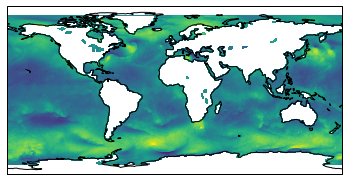

In [2]:
dataset = Dataset("/home/splash/cmems_data/ew/cmems_2020_3_26_ew.nc")
eastward_wind = dataset.variables['eastward_wind'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

t = time.process_time() #Starting Timer

#How CartoPy handles the problem
#CartoPy has provided documentation about transformation here: https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html
#And about Projections here: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy.crs.PlateCarree


ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, eastward_wind, 60, transform=ccrs.PlateCarree())

elapsed_time = time.process_time() - t #Ending Timer
print(elapsed_time) #Printing Time

#Plotting (can be made as fancy or as simple as we like)
ax.set_global()
ax.coastlines()
plt.show()

4.95424477


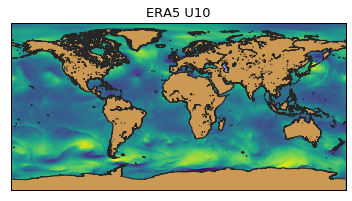

In [3]:
filename = '/home/splash/era5_data/u10m/era5_2020_3_21_u10m.nc'
with Dataset(filename, mode='r') as fh:
    lon = fh.variables['longitude'][:]
    lat = fh.variables['latitude'][:]
    u10 = fh.variables['u10'][0,:,:]
    
# take care of lon issue
fltr = lon >= 180
lonNew = np.concatenate(((lon - 360)[fltr], lon[~fltr]))

# now do the same for u10 (on X axis) but also invert Y axis with [::-1]
u10new = np.concatenate((u10[:, fltr], u10[:, ~fltr]), axis=-1)[::-1]

# now invert the remaining lat axis with [::-1]
latNew = lat[::-1]

lons_sub, lats_sub = np.meshgrid(lonNew[:], latNew[:])

t = time.process_time() #Starting Timer

#How Basemap handles the problem

coarse = interp(datain=u10new, xin=lonNew, yin=latNew, xout=lons_sub, yout=lats_sub, order=1)
m = Basemap(projection='cyl',llcrnrlat=latNew[0],llcrnrlon=lonNew[0],urcrnrlat=latNew[-1],urcrnrlon=lonNew[-1],resolution='i')

elapsed_time = time.process_time() - t #Ending Timer
print(elapsed_time) #Printing Time

#Plotting (can be made as fancy or as simple as we like)
x, y = m(lons_sub, lats_sub)
m.drawmapboundary(fill_color='#9999FF')
m.fillcontinents(color='#cc9955', lake_color='#9999FF', zorder = 1)
m.drawcoastlines(color = '0.15')
plt.title('ERA5 U10', fontsize=13)
data = m.pcolormesh(x,y,u10new)
plt.show(data)